In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.signal as signal
import scipy.fft as fft

import PyOMA as oma
from scipy.interpolate import interp2d

In [3]:
# Definimos os parâmetros amostrais
fs = 1024 # taxa de amostragem
tf = 256 # tempo total 
Np = fs*tf # número de pontos
t = np.linspace(0,tf,Np,endpoint=False)

#Import dos dados
df = np.asarray(pd.read_table('..\..\Dataset\Treino dataset\zzzAA0.TXT', sep='\t', skiprows=10))
t = df[:,0:]
df = df[:,1:]

Decimating...
Decimated
Filtering...
Filtered


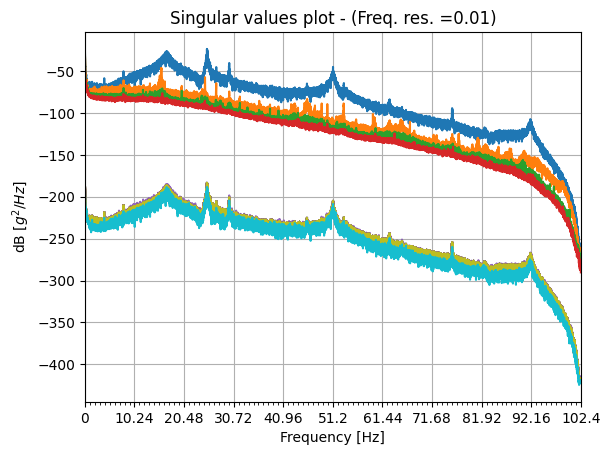

In [4]:
print('Decimating...')
q = 5 # Decimation factor
df = signal.decimate(df,  q, ftype='fir', axis=0) # Decimation
fs = fs/q # [Hz] Decimated sampling frequency
print('Decimated')

print('Filtering...')
b, a = signal.butter(2, 100, 'low', fs=1024)
for i in range(df.shape[1]):
        df[:,i] = signal.filtfilt(b, a, df[:,i], padlen=150)

print('Filtered')
##############TESTE PYOMA####################
FDD = oma.FDDsvp(df,  fs)


In [17]:
FreQ = [17.4, 24.57, 29.67, 51.2, 75.77, 92.16]
Res_FDD = oma.FDDmodEX(FreQ, FDD[1]) # extracting modal properties using standard FDD

print(f"Frequências: {Res_FDD['Frequencies']}")
Res_FDD['Mode Shapes']

Frequências: [17.38183594 24.58359375 29.67363281 51.20917969 75.75292969 92.16855469]


array([[ 5.78417920e-01+1.13344306e-02j,  4.24769058e-01-5.00894182e-03j,
         1.00000000e+00-0.00000000e+00j, -6.57063462e-01+3.48428560e-03j,
         1.58408245e-01-3.69809683e-02j, -2.54971614e-01-2.06071040e-04j],
       [ 8.85384160e-01+1.11933640e-02j,  6.62206344e-01-9.44991686e-03j,
         6.41468068e-01+3.03848109e-02j, -6.70520783e-01+3.38256065e-03j,
         1.79164257e-01-5.35573545e-03j, -4.91269161e-01-4.83373706e-02j],
       [ 1.00000000e+00-0.00000000e+00j,  7.93925846e-01-2.34262673e-02j,
         1.40626677e-01+5.16220823e-02j, -6.11291790e-01+2.43344916e-02j,
         2.00594555e-01+2.34709985e-02j, -5.88063447e-01+3.16537337e-02j],
       [ 9.18358422e-01+8.95900802e-03j,  8.02740044e-01-1.12630614e-02j,
        -4.25080305e-01+6.82610558e-02j, -5.37176645e-01+2.04037936e-04j,
         1.33948791e-01+3.81496260e-02j, -5.19023354e-01+3.50135670e-02j],
       [ 6.60900953e-01+8.20741858e-03j,  6.94880910e-01-4.77389188e-03j,
        -9.65964246e-01+7.04013104

0


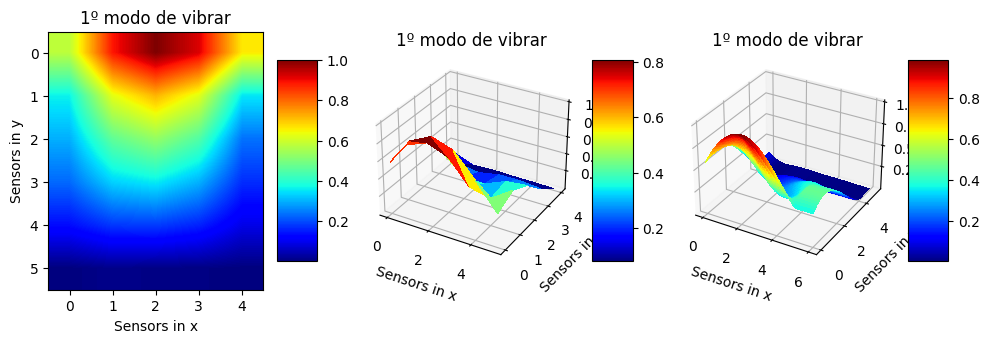

1


c:\Users\Guilherme Zerwes\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\interpolate\_fitpack_impl.py:977: RuntimeWarning: No more knots can be added because the number of B-spline
coefficients already exceeds the number of data points m.
Probable causes: either s or m too small. (fp>s)
	kx,ky=3,3 nx,ny=9,11 m=30 fp=0.017726 s=0.000000
  warnings.warn(RuntimeWarning(_iermess2[ierm][0] + _mess))


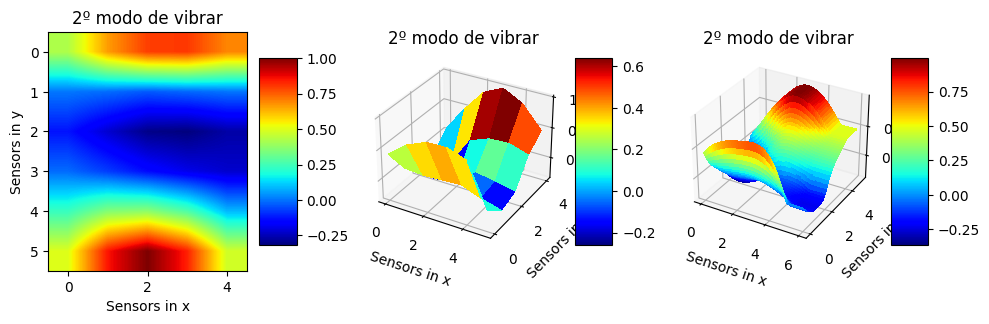

2


c:\Users\Guilherme Zerwes\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\interpolate\_fitpack_impl.py:977: RuntimeWarning: No more knots can be added because the number of B-spline
coefficients already exceeds the number of data points m.
Probable causes: either s or m too small. (fp>s)
	kx,ky=3,3 nx,ny=9,11 m=30 fp=0.495171 s=0.000000
  warnings.warn(RuntimeWarning(_iermess2[ierm][0] + _mess))


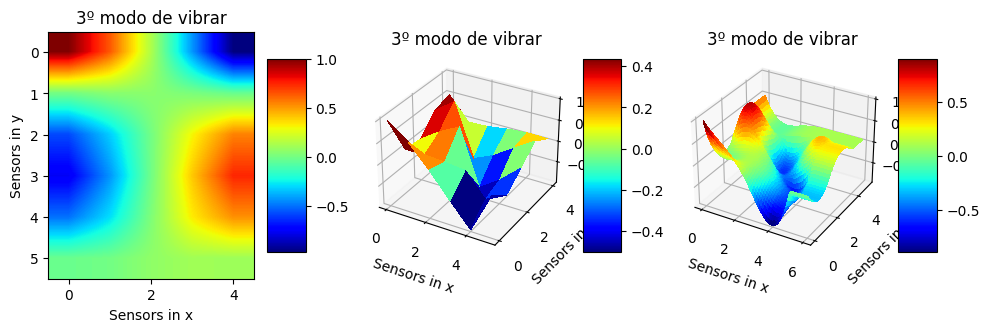

3


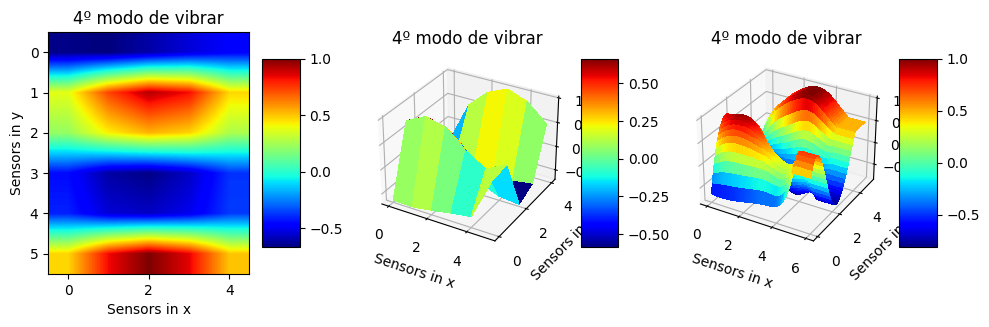

4


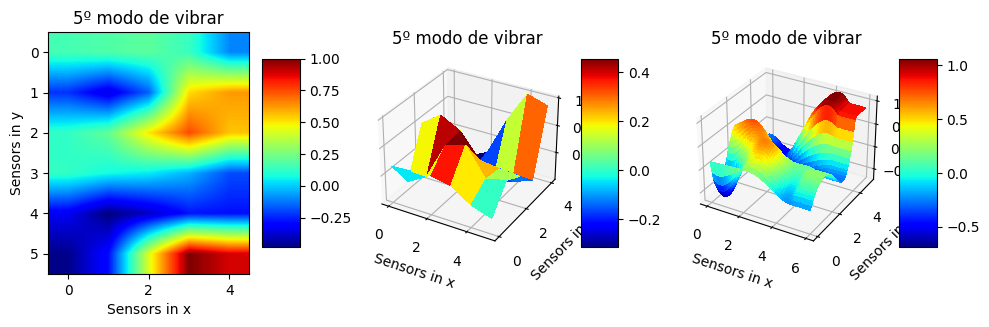

5


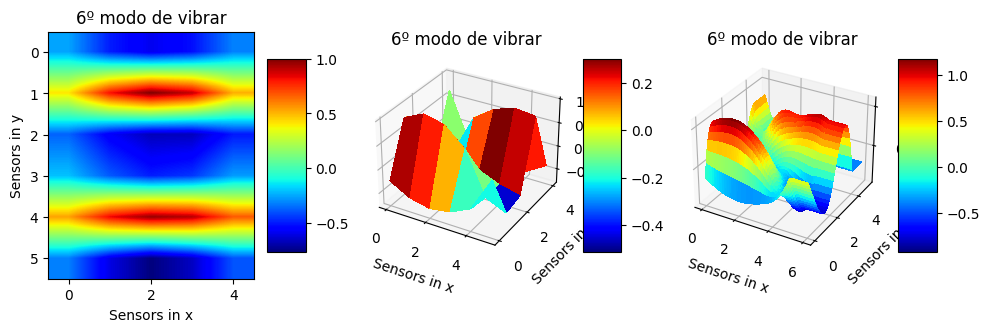

In [18]:
for i in range(Res_FDD['Mode Shapes'].shape[1]):
    fig = plt.figure(figsize=(10,10))
    print(i)
    #Heat map
    ax = fig.add_subplot(1, 3, 1)
    heat = np.real(Res_FDD['Mode Shapes'][:,i]).reshape(6,5)
    heatmap = ax.imshow(heat, interpolation='bilinear', cmap='jet')
    # ax.set_grid(True)
    # ax.set_colorbar(extend='both')
    fig.colorbar(heatmap, shrink=0.5, aspect=5)
    title = f'{i+1}º modo de vibrar'
    ax.set_title(title)
    ax.set_xlabel('Sensors in x')
    ax.set_ylabel('Sensors in y')

    #3d Surface
    X = np.arange(0, 6, 1)
    Y = np.arange(0, 5, 1)
    X, Y = np.meshgrid(X, Y)
    Z = np.real(Res_FDD['Mode Shapes'][:,i]).reshape(5,6)

    ax = fig.add_subplot(1, 3, 2, projection='3d')
    # fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
    surf = ax.plot_surface(X, Y, Z, cmap='jet', linewidth=0, antialiased=False, rcount=200, ccount=200)
    fig.colorbar(surf, shrink=0.5, aspect=5)
    title = f'{i+1}º modo de vibrar'
    ax.set_title(title)
    ax.set_xlabel('Sensors in x')
    ax.set_ylabel('Sensors in y')


    #Nice 3d surface
    x2 = np.linspace(0, 6, 60)
    y2 = np.linspace(0, 5, 50)
    f = interp2d(X, Y, Z, kind='cubic')
    Z2 = f(x2, y2)

    X2, Y2 = np.meshgrid(x2, y2)
    # fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
    ax = fig.add_subplot(1, 3, 3, projection='3d')
    surf = ax.plot_surface(X2, Y2, Z2, cmap='jet', linewidth=0, antialiased=False, rcount=200, ccount=200)
    fig.colorbar(surf, shrink=0.5, aspect=5)
    title = f'{i+1}º modo de vibrar'
    ax.set_title(title)
    ax.set_xlabel('Sensors in x')
    ax.set_ylabel('Sensors in y')
    plt.tight_layout()
    plt.show()